In [4]:

import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [3]:

car_price=pd.read_csv("/content/car_purchasing.csv",encoding='latin-1')

In [5]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
car_price.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [7]:
car_price.describe(include="all")

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,498,500,211,NaN,NaN,NaN,NaN,NaN,NaN
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,1,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,NaN,NaN,NaN,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,NaN,NaN,NaN,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,NaN,NaN,NaN,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,NaN,NaN,NaN,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,NaN,NaN,NaN,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517



#Basic visualisation of the columns 

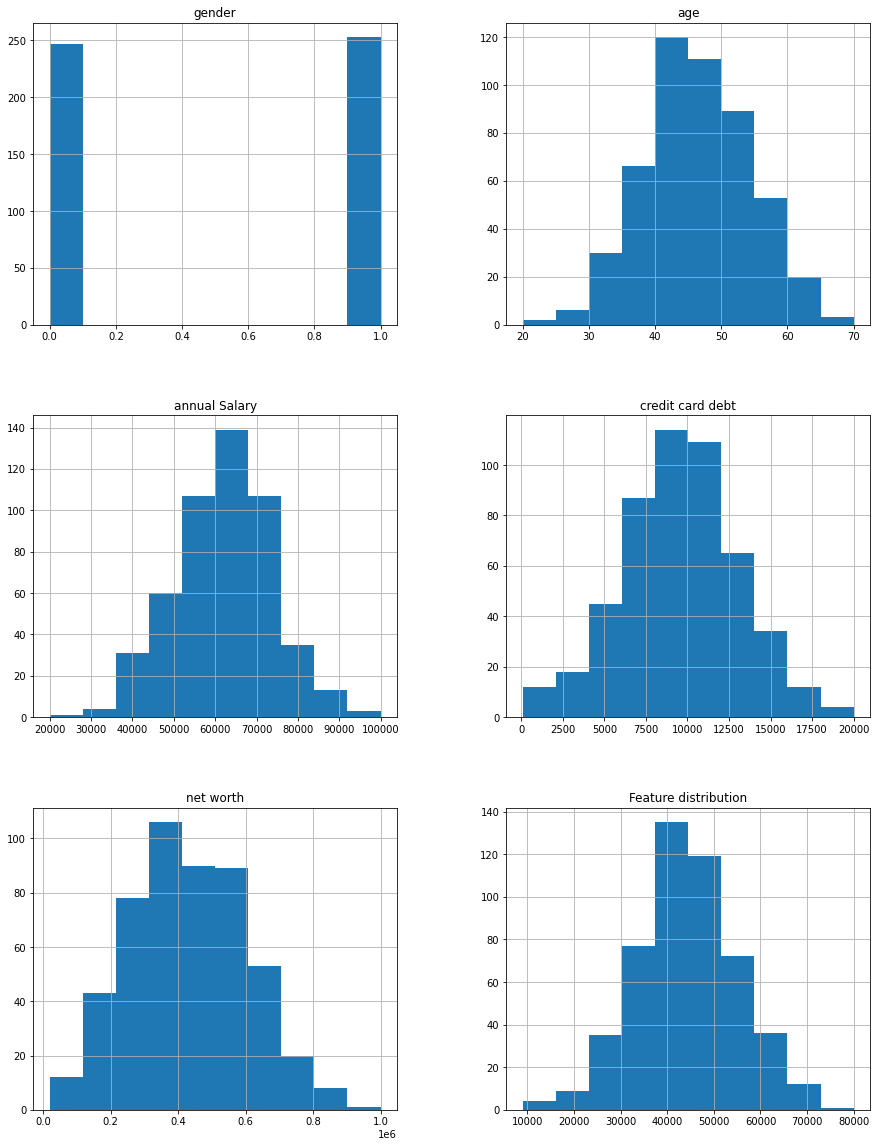

In [8]:
car_price.hist(figsize=(15,20))
plt.title("Feature distribution")
plt.show()


#Almost all feature look close to normal distribution and there is not much skewness in the data
     

In [9]:
car_price.drop(['customer name', 'country', 'customer e-mail'],axis=1,inplace=True)

In [10]:
car_price.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
car_price.dtypes

gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object


Split in to X and Y 

In [12]:
x=car_price.drop(["car purchase amount"],axis=1)
y=car_price["car purchase amount"]
     

In [13]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#from sklearn.preprocessing import StandardScaler

#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.fit_transform(x_test)

NOW we will do the modelling using the different hidden layers and see the difference in MSE 

In [15]:

classifier1=Sequential()
#model : input layer , H1,H2,output layer
#input layer
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=5))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier1.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])

In [16]:
history1 = classifier1.fit(x_train , y_train , epochs = 100, batch_size = 64,
           validation_split = 0.2,verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 166ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 5/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 6/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0245 - mse: 0.0

In [17]:

classifier2=Sequential()


classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=5))
classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier2.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier2.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])

In [18]:

history2 = classifier2.fit(x_train , y_train , epochs = 100, batch_size = 64,
           validation_split = 0.2,verbose=1)
     

Epoch 1/100
5/5 [==============================] - 1s 37ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0234 - mse: 0.0234 - 

In [19]:
classifier3=Sequential()
#model : input layer , H1,H2,output layer
#input layer
classifier3.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=5))
classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier3.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier3.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier3.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier3.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])

In [20]:
history3 = classifier3.fit(x_train , y_train , epochs = 100, batch_size = 64,
           validation_split = 0.2,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 37ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - va

In [21]:
y_pred = classifier1.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
     

1.3872790053869674e-05

In [23]:

history1.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

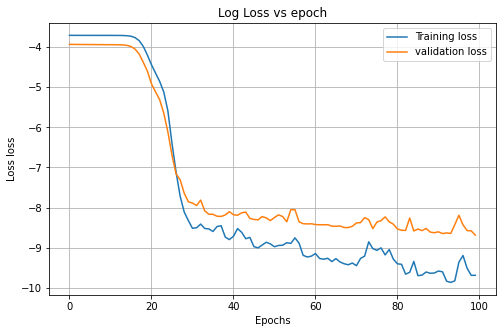

In [24]:

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['loss']), label = "Training loss")
ax.plot(np.log(history1.history['val_loss']), label = "validation loss")
ax.set_title("Log Loss vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss loss")
ax.legend()
ax.grid()
plt.show()
     

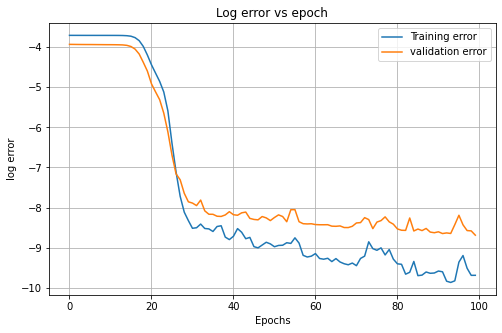

In [25]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['mse']), label = "Training error")
ax.plot(np.log(history1.history['val_mse']), label = "validation error")
ax.set_title("Log error vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("log error")
ax.legend()
ax.grid()
plt.show()

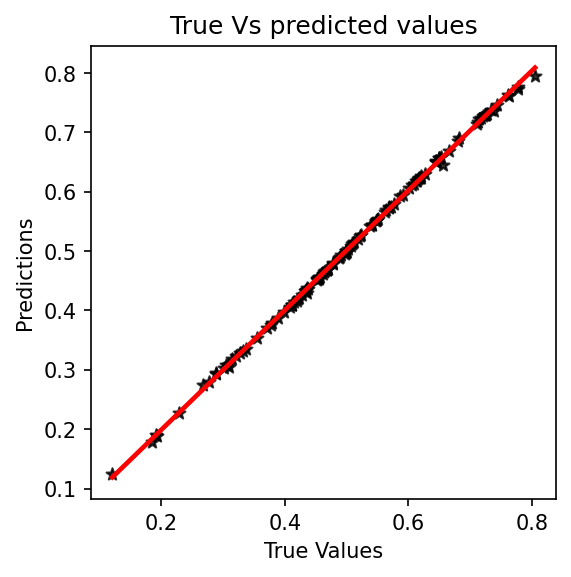

In [26]:

import seaborn as sns
plt.figure(figsize=(4,4),dpi=150)
sns.regplot(x=y_test, y=y_pred,color='red',marker='*',scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('True Vs predicted values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()